## Problem Statement:

### Clustering:

#### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

### Import Libraries and load data

In [5]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import os

import matplotlib.pyplot as plt
%matplotlib inline

!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 

# To Avoiding warnings
from warnings import filterwarnings
filterwarnings("ignore")

### 1. Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.. 

In [6]:
Digital_Ads = pd.read_excel('Clustering Clean Ads_Data.xlsx')

### Checking the data

In [7]:
Digital_Ads.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [8]:
Digital_Ads.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [9]:
Digital_Ads.shape

(23066, 19)

In [10]:
Digital_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### Check Duplicate value 

In [11]:
Digital_Ads.duplicated().sum()

0

### Check Null-value 

In [12]:
Digital_Ads.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

### 2. Clustering: Treat missing values in CPC, CTR and CPM using the formula given.
#### Formula Based Technique to treat missing values

**CPM = (Total Campaign Spend / Number of Impressions) * 1,000.**

Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

**CPC = Total Cost (spend) / Number of Clicks.** 

Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

**CTR = Total Measured Clicks / Total Measured Ad Impressions x 100.** 

Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

In [13]:
# Define a function to calculate missing CPC, CTR, and CPM values
def calculate_missing_values(row):
    if pd.isnull(row['CPM']):
        row['CPM'] = (row['Spend'] / row['Impressions']) * 1000
    
    if pd.isnull(row['CPC']):
        row['CPC'] = row['Spend'] / row['Clicks']
    
    if pd.isnull(row['CTR']):
        row['CTR'] = row['Clicks'] / (100 * row['Impressions'])

    return row

# Apply the function to the DataFrame to fill missing values
Digital_Ads = Digital_Ads.apply(calculate_missing_values, axis=1)

In [14]:
Digital_Ads.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [15]:
Digital_Ads.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,0.010,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,0.005,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,0.010,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,0.010,70.0,0.07
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,0.005,45.0,0.09


In [16]:
Digital_Ads.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Checking Summary Statistic

In [17]:
round(Digital_Ads.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.163,233.651,120.00,120.000,300.000,720.000,728.00
Ad- Width,23066.0,337.896,203.093,70.00,250.000,300.000,600.000,600.00
Ad Size,23066.0,96674.468,61538.330,33600.00,72000.000,72000.000,84000.000,216000.00
Available_Impressions,23066.0,2432043.666,4742887.765,1.00,33672.250,483771.000,2527711.750,27592861.00
Matched_Queries,23066.0,1295099.143,2512969.861,1.00,18282.500,258087.500,1180700.000,14702025.00
Impressions,23066.0,1241519.519,2429399.961,1.00,7990.500,225290.000,1112428.500,14194774.00
Clicks,23066.0,10678.519,17353.409,1.00,710.000,4425.000,12793.750,143049.00
Spend,23066.0,2706.626,4067.927,0.00,85.180,1425.125,3121.400,26931.87
Fee,23066.0,0.335,0.032,0.21,0.330,0.350,0.350,0.35
Revenue,23066.0,1924.252,3105.238,0.00,55.365,926.335,2091.338,21276.18


### 3. Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [18]:
Digital_Ads.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

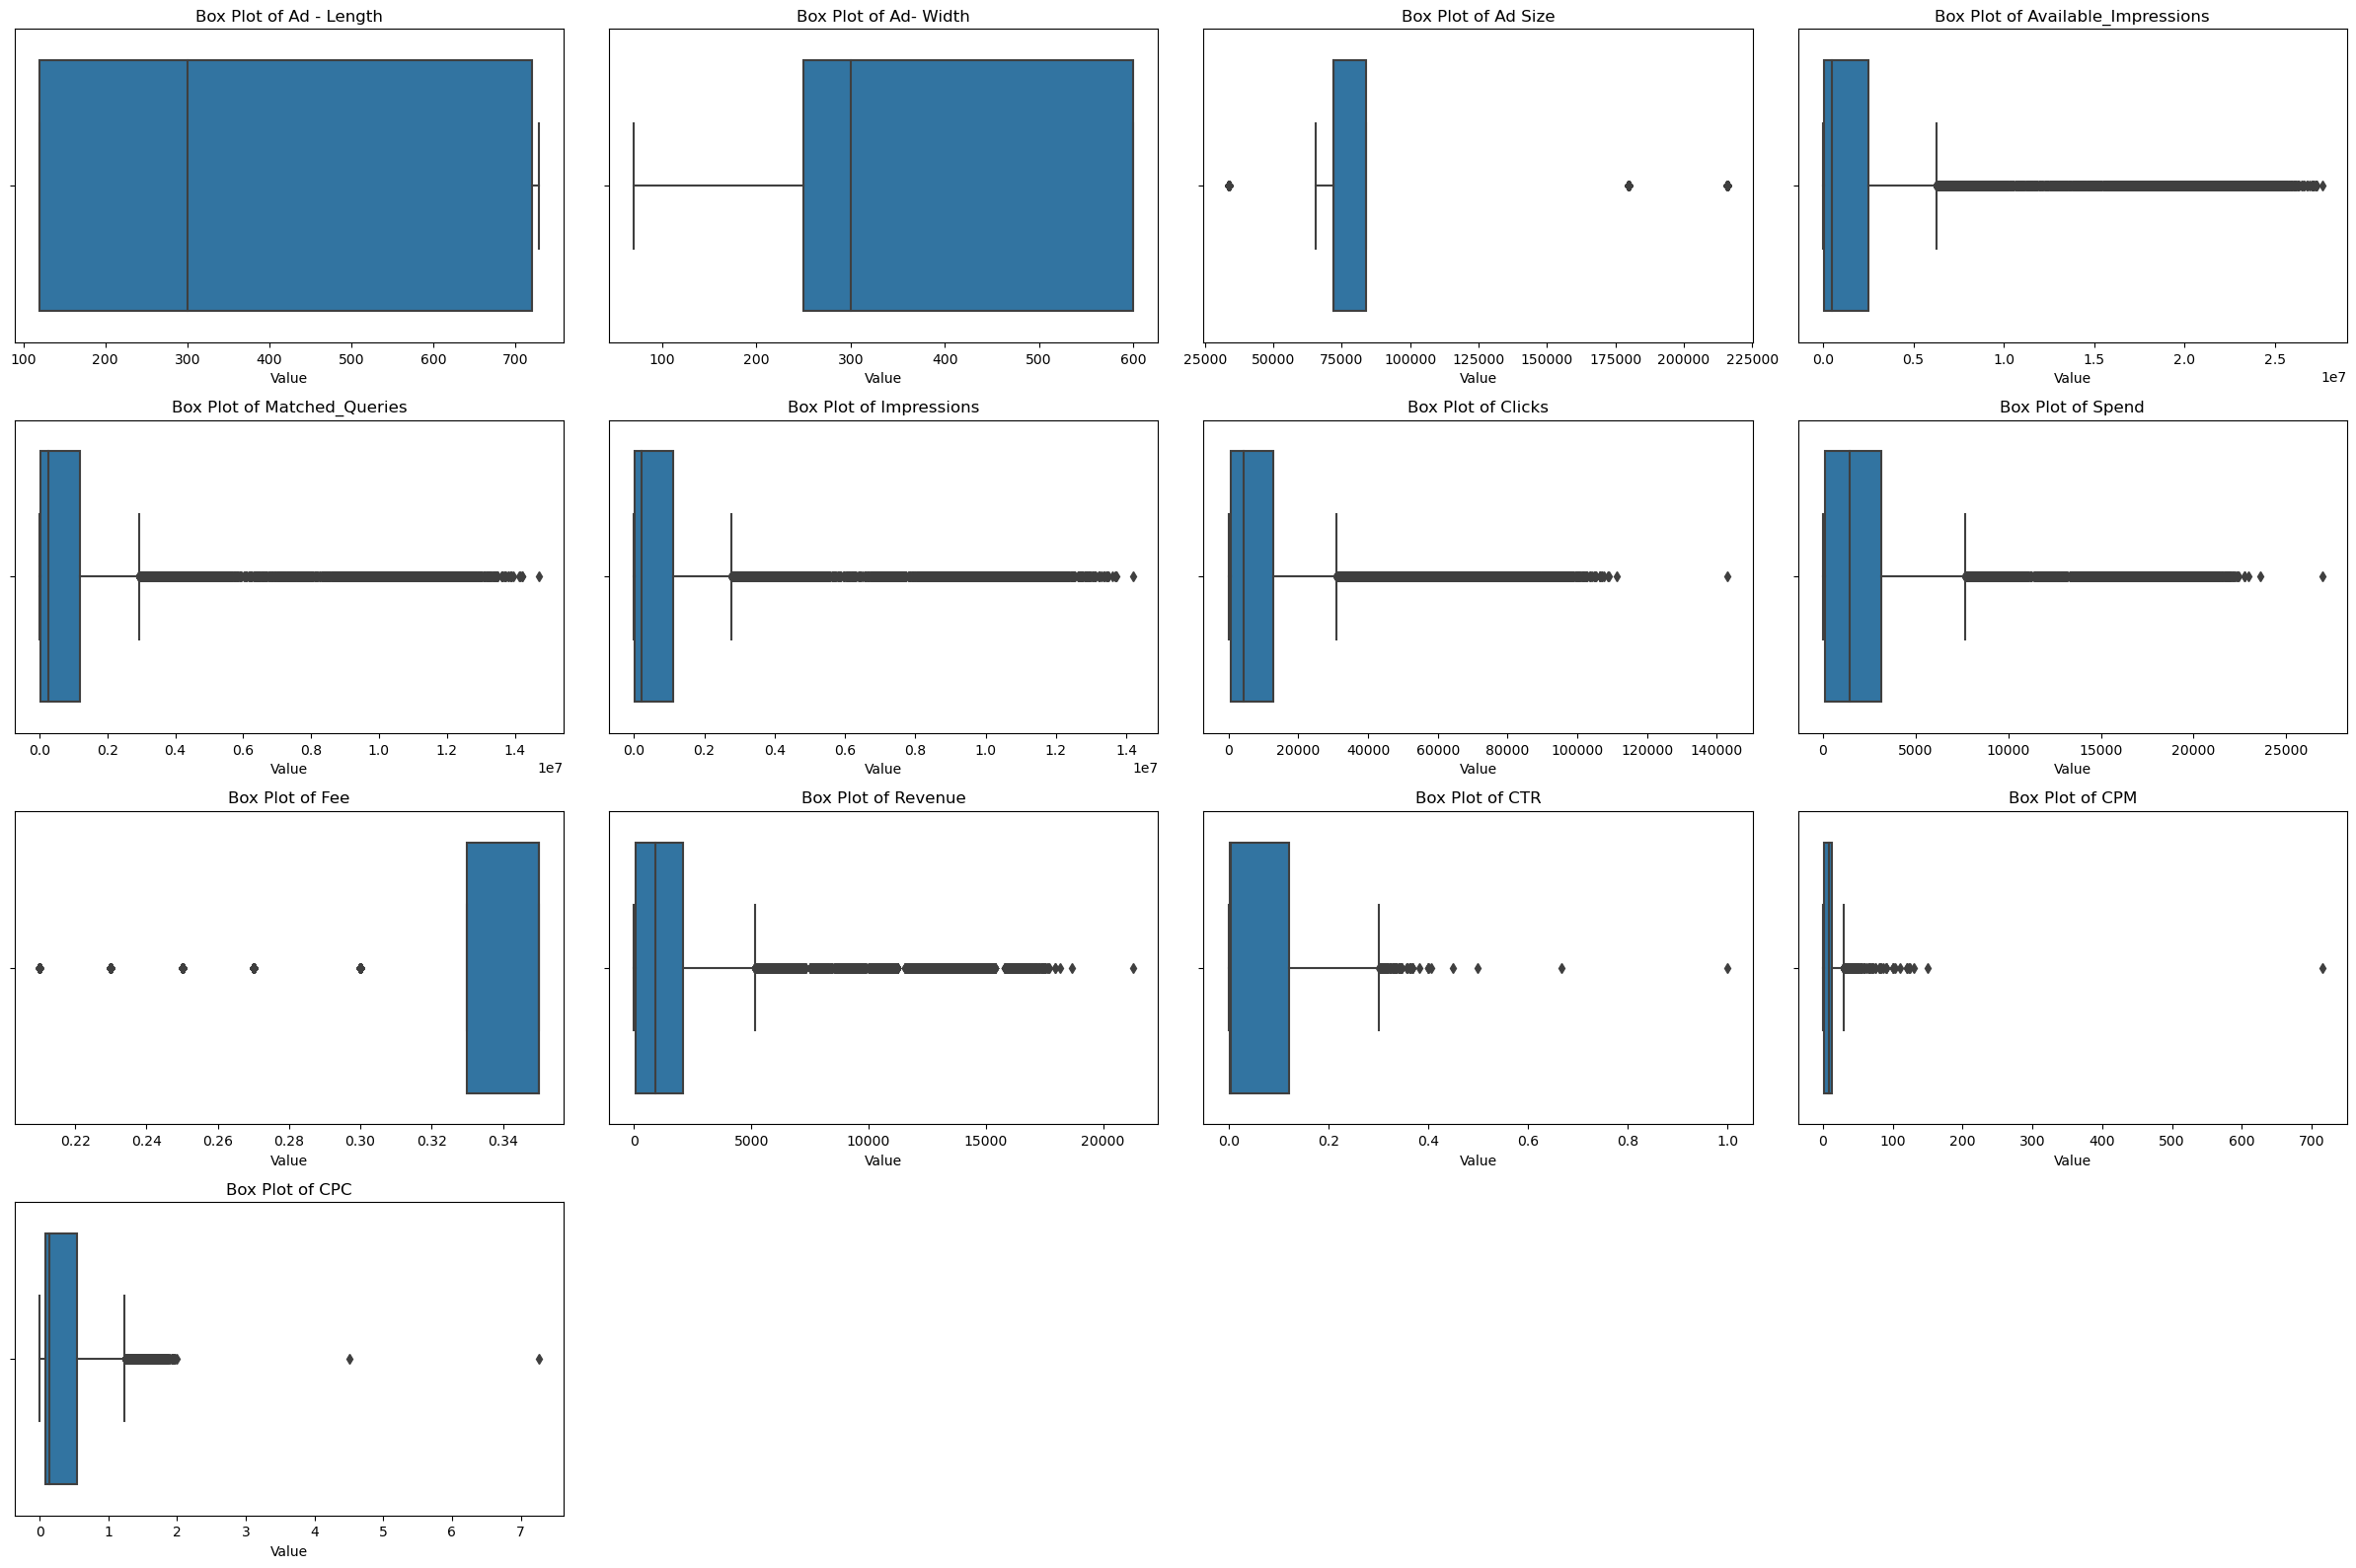

In [19]:
# Define the columns to plot
columns_to_plot = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
                   'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
                   'CTR', 'CPM', 'CPC']

# Plot individual box plots for each numeric column
num_plots = len(columns_to_plot)
num_rows = 4  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=Digital_Ads[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [20]:
def remove_outliers(col):
    min_val,max_val = col.quantile([0.25,0.75])
    return min_val,max_val

In [21]:
for n in columns_to_plot:
    LL,UL = remove_outliers(Digital_Ads[n])
    Digital_Ads[n]=np.where(Digital_Ads[n]>UL,UL,Digital_Ads[n])
    Digital_Ads[n]=np.where(Digital_Ads[n]<LL,LL,Digital_Ads[n])

In [22]:
len(columns_to_plot)

13

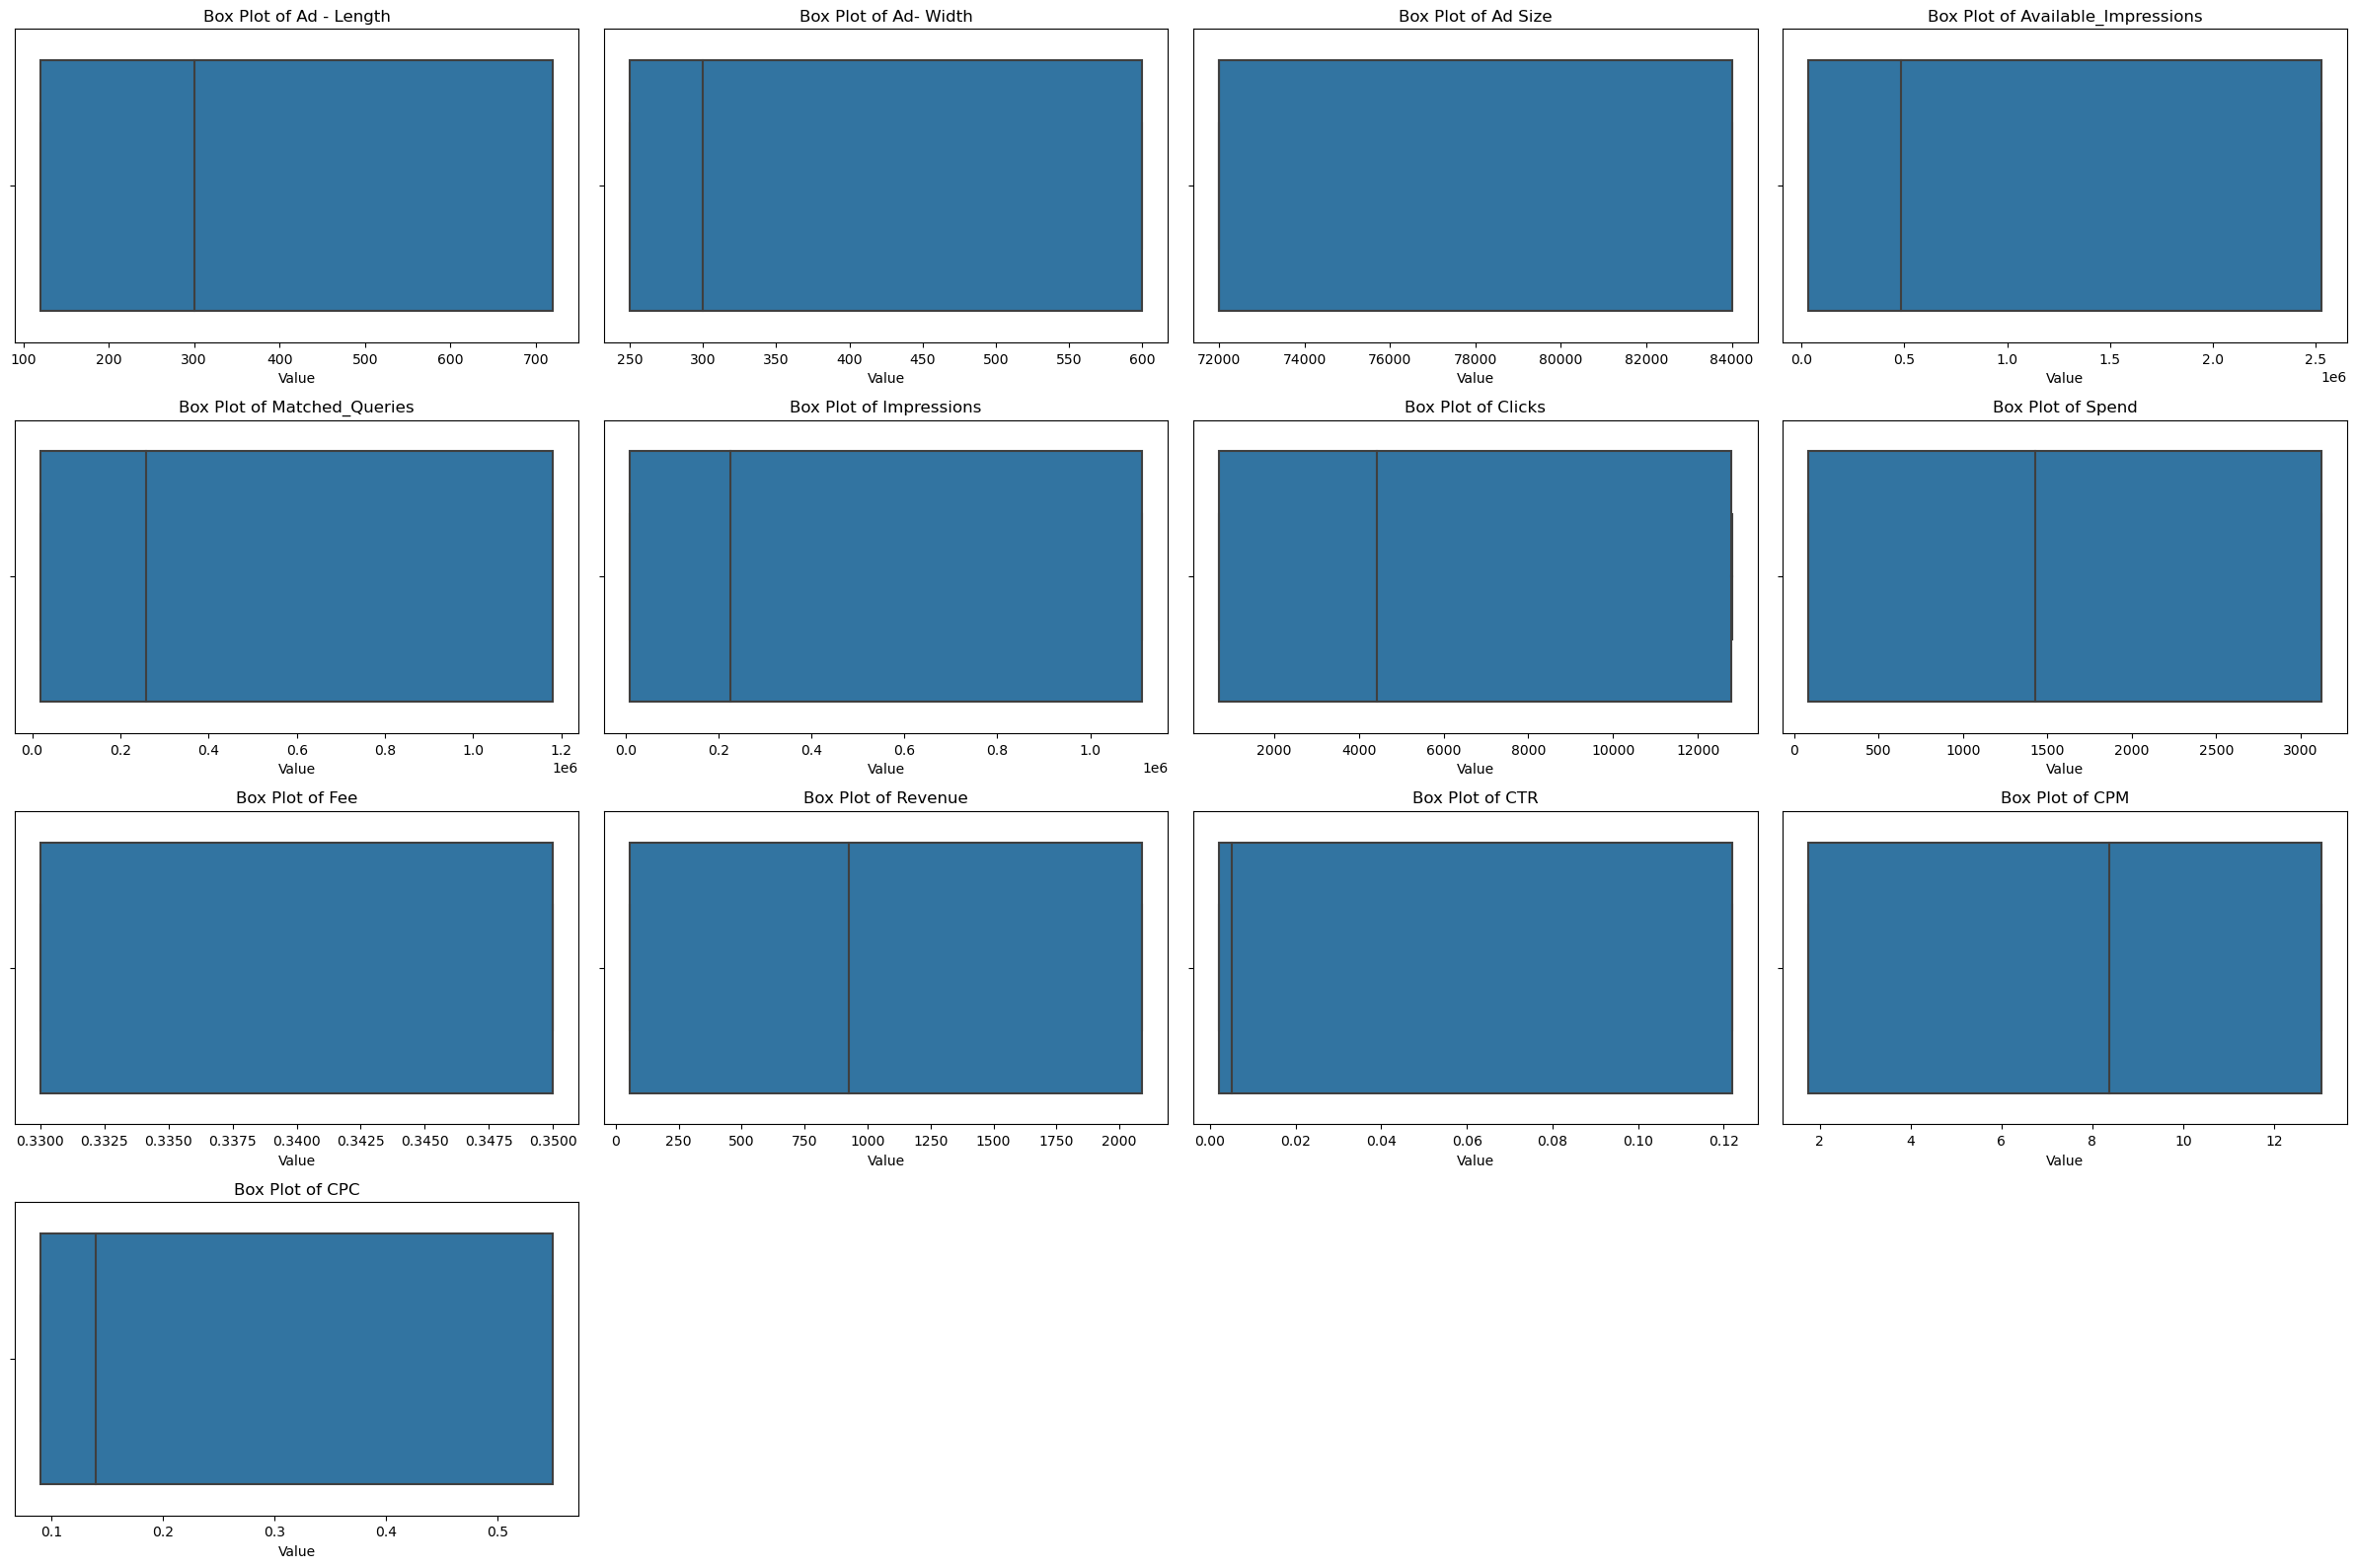

In [23]:
# Plot individual box plots for each numeric column
num_plots = len(columns_to_plot)
num_rows = 4  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=Digital_Ads[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### 4. Perform z-score scaling and discuss how it affects the speed of the algorithm.

#### To perform StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
Digital_data = Digital_Ads[columns_to_plot].copy()

# Convert the scaled_data NumPy array back to a DataFrame
scaled_data = pd.DataFrame(Digital_data)

# Now you can view the first few rows of the scaled DataFrame
scaled_data.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0031,1.75,0.09
1,300.0,250.0,75000.0,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0035,1.75,0.09
2,300.0,250.0,75000.0,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0028,1.75,0.09
3,300.0,250.0,75000.0,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0021,1.75,0.09
4,300.0,250.0,75000.0,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0041,1.75,0.09


**Insights:** Z-score scaling (standardization) is a common data preprocessing technique used to scale features in a dataset. It transforms each feature to have a mean of 0 and a standard deviation of 1, making the data more suitable for certain machine learning algorithms.

Overall, the performance and effectiveness of the K-Means clustering technique may be improved by z-score scaling. It promotes faster convergence and ensures that all characteristics are handled equally during the clustering process. Additionally, the standardized feature scales may enhance the stability and quality of the generated clusters.

### 5. Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
wardlink = linkage(scaled_data, method = 'ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [62.5, 62.5, 100.0, 100.0],
  [45.0, 45.0, 81.25, 81.25],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [345.0, 345.0, 362.5, 362.5],
  [335.0, 335.0, 353.75, 353.75],
  [325.0, 325.0, 344.375, 344.375],
  [315.0, 315.0, 334.6875, 334.6875],
  [305.0, 305.0, 324.84375, 324.84375],
  [295.0, 295.0, 314.921875, 314.921875],
  [285.0, 285.0, 304.9609375, 304.9609375],
  [275.0, 275.0, 294.98046875, 294.98046875],
  [265.0, 265.0, 284.990234375, 284.990234375],
  [255.0, 255.0, 274.9951171875, 274.9951171875],
  [245.0, 245.0, 264.99755859375, 264.99755859375],
  [235.0, 235.0, 254.998779296875, 254.998779296875],
  [225.0, 225.0, 244.9993896484375, 244.9993896484375],
  [215.0, 215.0, 234.99969482421875, 234.99969482421875],
  [205.0, 205.0, 224.99984741210938,

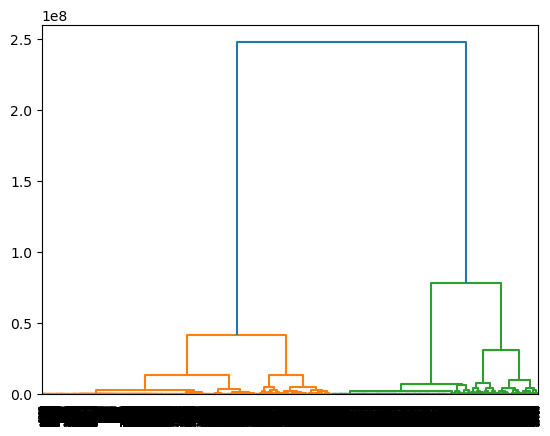

In [29]:
dendrogram(wardlink)

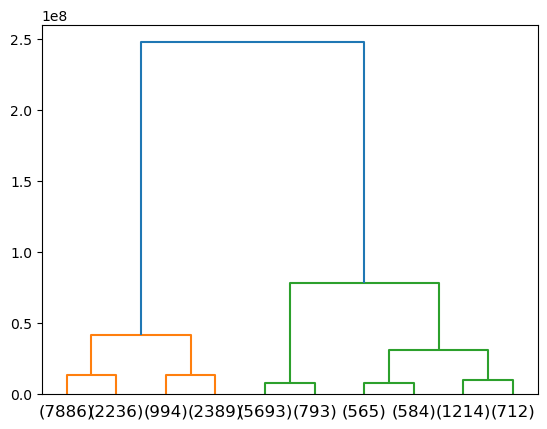

In [30]:
dend = dendrogram(wardlink,truncate_mode='lastp',p=10)

In [45]:
# Perform hierarchical clustering using Ward linkage and Euclidean distance
linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')
linkage_matrix

array([[0.00000000e+00, 5.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.61250000e+04, 4.61270000e+04, 2.73394790e+02, 1.19800000e+04],
       [4.61230000e+04, 4.61260000e+04, 2.97828390e+02, 1.10860000e+04],
       [4.61280000e+04, 4.61290000e+04, 4.94784625e+02, 2.30660000e+04]])

### 6. Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

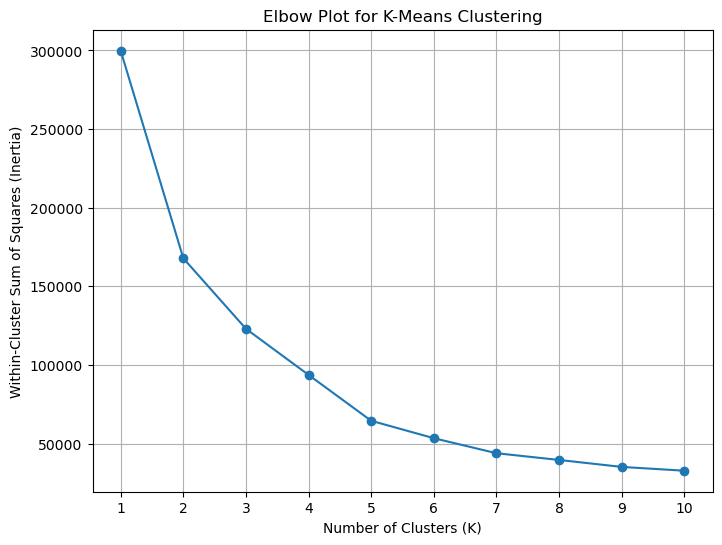

In [46]:
# Fit and transform the selected columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Digital_Ads[columns_to_plot])

# Elbow plot
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

**Insigths:** The x-axis represents the number of clusters (K), and the y-axis represents the WCSS. The elbow point is identified as the "bend" in the plot, where the WCSS starts to level off. The optimum number of clusters can be chosen based on the location of this elbow point.

* Here K = 1 to 2 is a significant drop, and K = 2 to 3, k=3 to 4 and k=4 to 5 are also a significant drop, but after 5–10 drops, it becomes very graduated.

* So the 5 is a optimal number.

In [47]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_data)
labels=k_means.labels_
labels

array([1, 1, 1, ..., 2, 1, 2])

In [50]:
Digital_Ads["Clus_kmeans5"] = labels
Digital_Ads.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0031,1.75,0.09,1
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0035,1.75,0.09,1
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0028,1.75,0.09,1
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0021,1.75,0.09,1
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,33672.25,18282.5,7990.5,710.0,85.18,0.35,55.365375,0.0041,1.75,0.09,1


### 7. Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
silhouette_score(scaled_data,labels)

0.5069189501741144

In [54]:
sil_width = silhouette_samples(scaled_data,labels)

In [55]:
Digital_Ads["sil_width"] = sil_width
Digital_Ads.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5,sil_width
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,33672.25,...,7990.5,710.0,85.18,0.35,55.365375,0.0031,1.75,0.09,1,0.149549
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,33672.25,...,7990.5,710.0,85.18,0.35,55.365375,0.0035,1.75,0.09,1,0.150158
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,33672.25,...,7990.5,710.0,85.18,0.35,55.365375,0.0028,1.75,0.09,1,0.149086
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,33672.25,...,7990.5,710.0,85.18,0.35,55.365375,0.0021,1.75,0.09,1,0.147992
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,33672.25,...,7990.5,710.0,85.18,0.35,55.365375,0.0041,1.75,0.09,1,0.151057


In [57]:
silhouette_samples(scaled_data,labels).min()

-0.07656855547495799

In [60]:
# Calculate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters (K) = {k}, Silhouette Score = {silhouette_avg:.4f}")

Number of clusters (K) = 2, Silhouette Score = 0.4103
Number of clusters (K) = 3, Silhouette Score = 0.4167
Number of clusters (K) = 4, Silhouette Score = 0.4491
Number of clusters (K) = 5, Silhouette Score = 0.5069
Number of clusters (K) = 6, Silhouette Score = 0.5037
Number of clusters (K) = 7, Silhouette Score = 0.5046
Number of clusters (K) = 8, Silhouette Score = 0.5153
Number of clusters (K) = 9, Silhouette Score = 0.5034
Number of clusters (K) = 10, Silhouette Score = 0.5004


* Optimal number of clusters is 5

### 8. Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

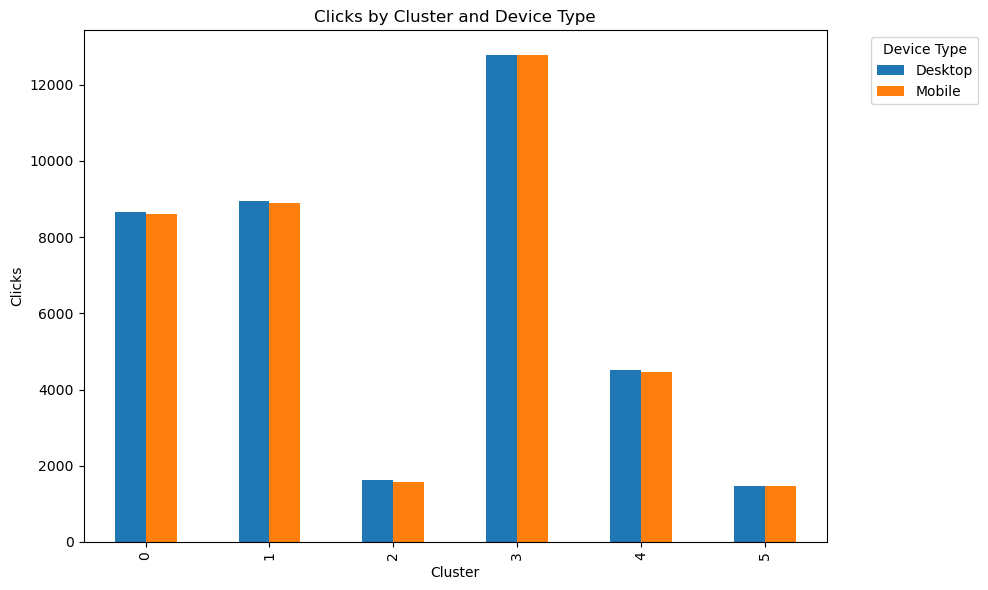

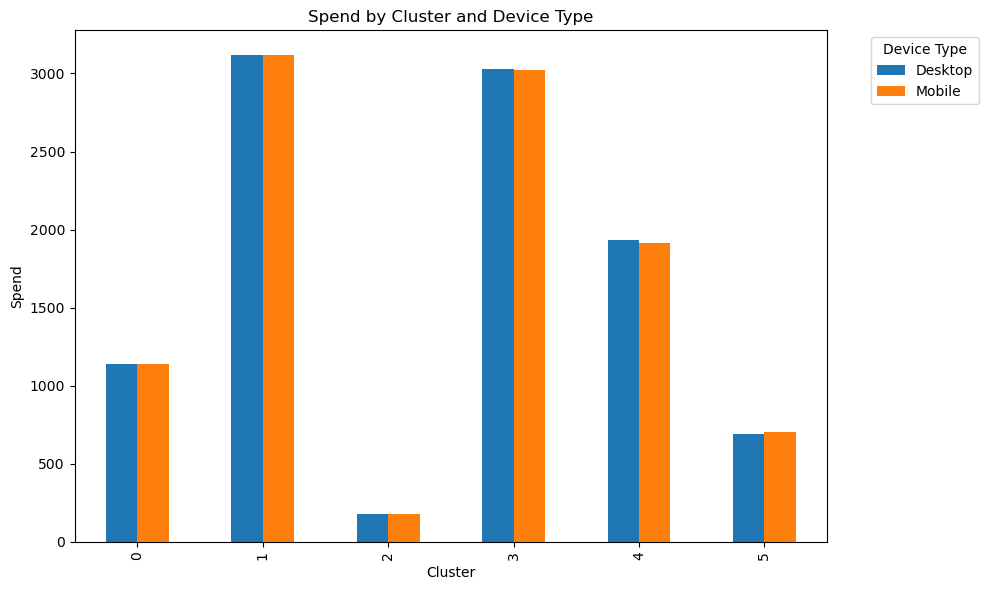

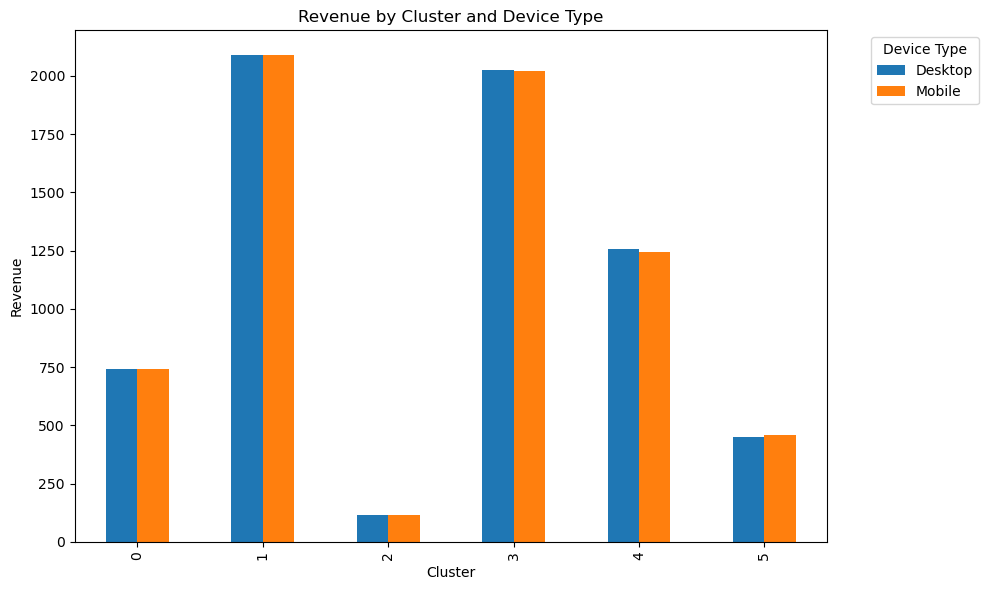

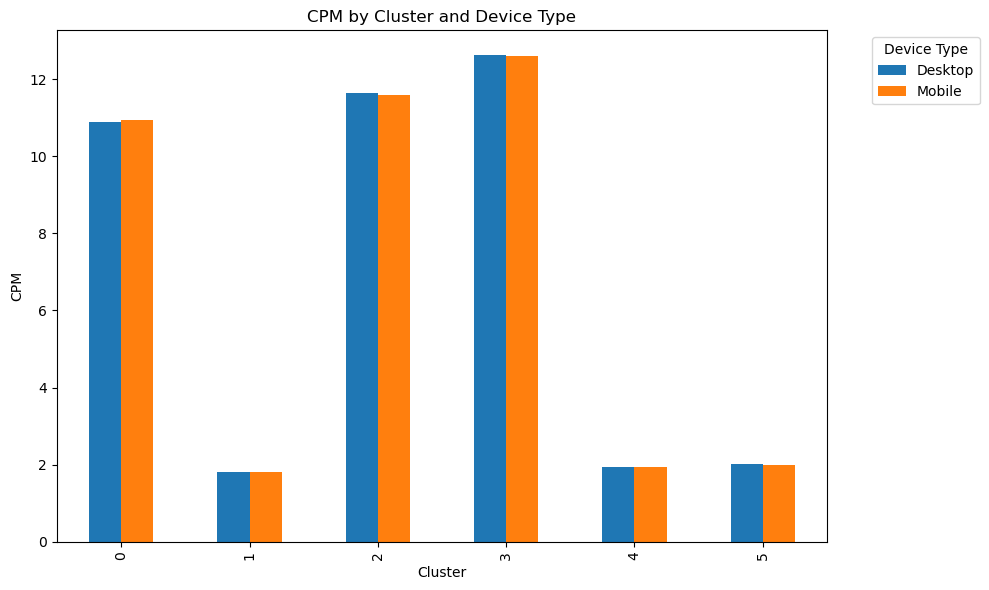

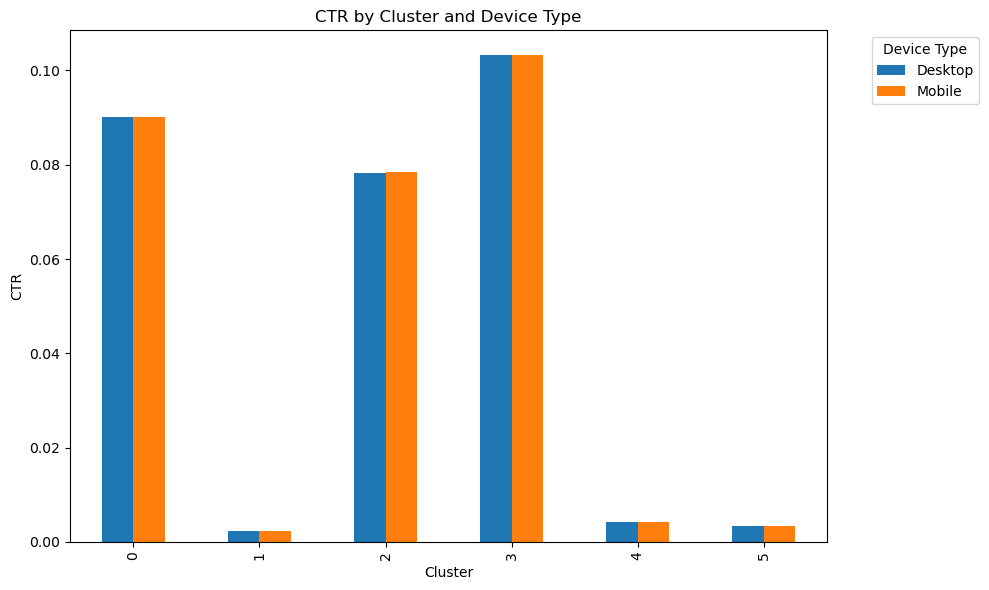

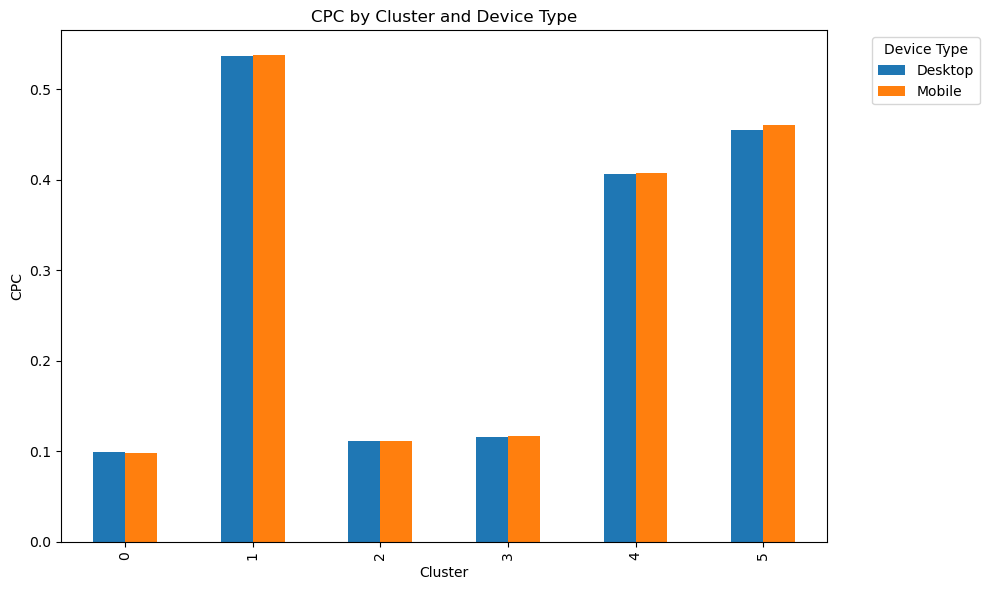

In [62]:
# Fit and transform the selected columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Digital_Ads[columns_to_plot])

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Digital_Ads['Cluster'] = kmeans.fit_predict(scaled_data)

# Group the data by clusters and Device Type, and calculate the mean of relevant metrics
grouped_data = Digital_Ads.groupby(['Cluster', 'Device Type']).agg({
    'Clicks': 'mean',
    'Spend': 'mean',
    'Revenue': 'mean',
    'CPM': 'mean',
    'CTR': 'mean',
    'CPC': 'mean'
}).reset_index()

# Create bar plots for each metric
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    grouped_data.pivot(index='Cluster', columns='Device Type', values=metric).plot(kind='bar', ax=ax)
    plt.title(f'{metric} by Cluster and Device Type')
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**Insights:** The bar plots will help you understand how different metrics vary across clusters and Device Types, enabling you to profile the ads based on the clustering results and domain understanding.

- Clicks by Cluster and Device Type: Cluster 3 with Desktop and Mobile has more than 12000, and Cluster 5 with Desktop and Mobile has less than 2000.
- Spend by Cluster and Device Type: Cluster 1 with Desktop and Mobile has more than 3000 and Cluster 2 with Desktop and Mobile has less than 500.
- Revenue by Cluster and Device Type: Cluster 1 with Desktop and Mobile has more than 2000, and Cluster 2 with Desktop and Mobile has less than 250.
- CPM by Cluster and Device Type: Cluster 3 with Desktop and Mobile has more than 12, and Cluster 2 with Desktop and Mobile has less than 2.
- CPM by Cluster and Device Type: Cluster 3 with Desktop and Mobile has more than 0.10, and Cluster 2 with Desktop and Mobile has less than 0.02.
- CPC by Cluster and Device Type: Cluster 1 with Desktop and Mobile has more than 0.5, and Cluster 0 with Desktop and Mobile has approximately 0.1.

 ### 9. Clustering: Conclude the project by providing summary of your learnings.

* The dataset consists of 23066 rows and 19 columns. To handle missing values in the 'CPC', 'CTR', and 'CPM' variables, we used a user-defined function that applied appropriate formulas to impute the missing data.

* After handling missing values, we performed outlier detection and found that there are outliers present in some variables of the dataset.

* Next, we visualized the data using a dendrogram by computing linkage with Ward's method. The linkage function was applied on the relevant columns of the data to calculate the distances and sequentially merge the clusters from 'n' to '1'. This allowed us to observe how the distances change during the clustering process.

* Using the fit-transform function, we stored the data frame in an array for further analysis. With this array, we proceeded to perform k-means clustering. However, before running the k-means algorithm, we needed to determine the optimal number of clusters to use as output.

* To find the optimal number of clusters, we created an elbow plot by plotting the within-cluster sum of squares (WSS) values for different values of 'k' (number of clusters). The elbow plot indicated that the WSS values significantly dropped when moving from k=1 to k=2, and again from k=2 to k=3 and k=3 to k=4. However, beyond k=4, the drop in WSS values reduced, suggesting that k=5 is the optimal number of clusters.

* Based on this analysis, we proceeded with k-means clustering using 5 clusters to segment the data and identify distinct patterns within the dataset."

## Problem Statement:

### PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, 

(i) Cultivators, 
(ii) Agricultural Laborers, 
(iii) Household Industry Workers, and 
(iv) Other Workers and also Non-Workers. 

The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

 ### 1. PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [63]:
PCA_India = pd.read_excel('PCA India Data_Census.xlsx')

#### Checking the data

In [64]:
PCA_India.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [65]:
PCA_India.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [66]:
PCA_India.shape

(640, 61)

In [67]:
PCA_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [68]:
PCA_India.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


#### Check Duplicate value

In [69]:
PCA_India.duplicated().sum()

0

#### Check Null-value

In [70]:
PCA_India.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

**Insights:** There are Rows 640 and columns 61. no duplicate values and no null values.

### 2. PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 

### To perform detailed EDA

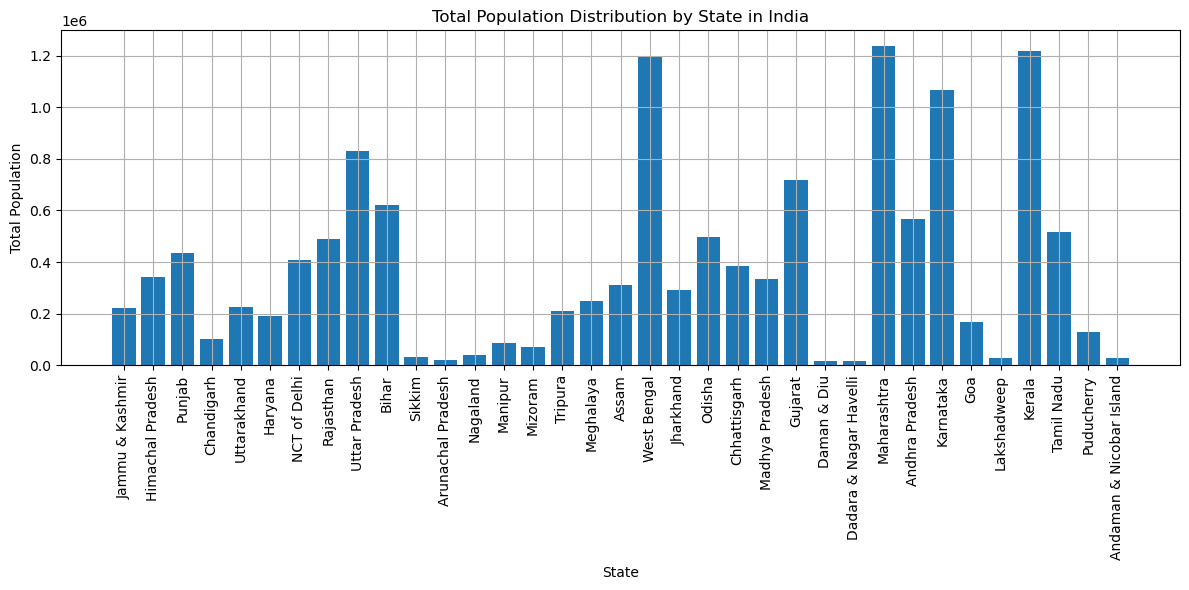

State with the highest population: Maharashtra


In [71]:
# Calculate the total population for each state
PCA_India['Total_Population'] = PCA_India['TOT_M'] + PCA_India['TOT_F']

# Find the state with the highest population
highest_population_state = PCA_India.loc[PCA_India['Total_Population'].idxmax(), 'State']

# Create a bar plot to visualize the population distribution across states
plt.figure(figsize=(12, 6))
plt.bar(PCA_India['State'], PCA_India['Total_Population'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population Distribution by State in India')
plt.grid(True)
plt.tight_layout()
plt.show()

print("State with the highest population:", highest_population_state)

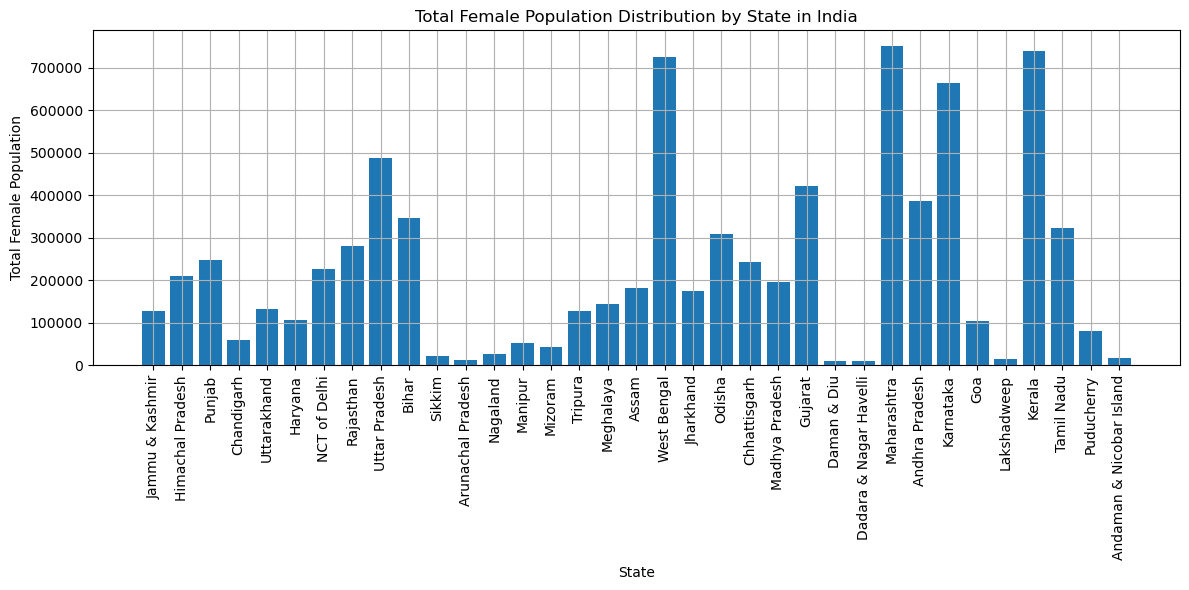

State with the highest total female population: Maharashtra


In [72]:
# Find the state with the highest total female population
highest_female_population_state = PCA_India.loc[PCA_India['TOT_F'].idxmax(), 'State']

# Create a bar plot to visualize the total female population distribution across states
plt.figure(figsize=(12, 6))
plt.bar(PCA_India['State'], PCA_India['TOT_F'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Female Population')
plt.title('Total Female Population Distribution by State in India')
plt.grid(True)
plt.tight_layout()
plt.show()

print("State with the highest total female population:", highest_female_population_state)

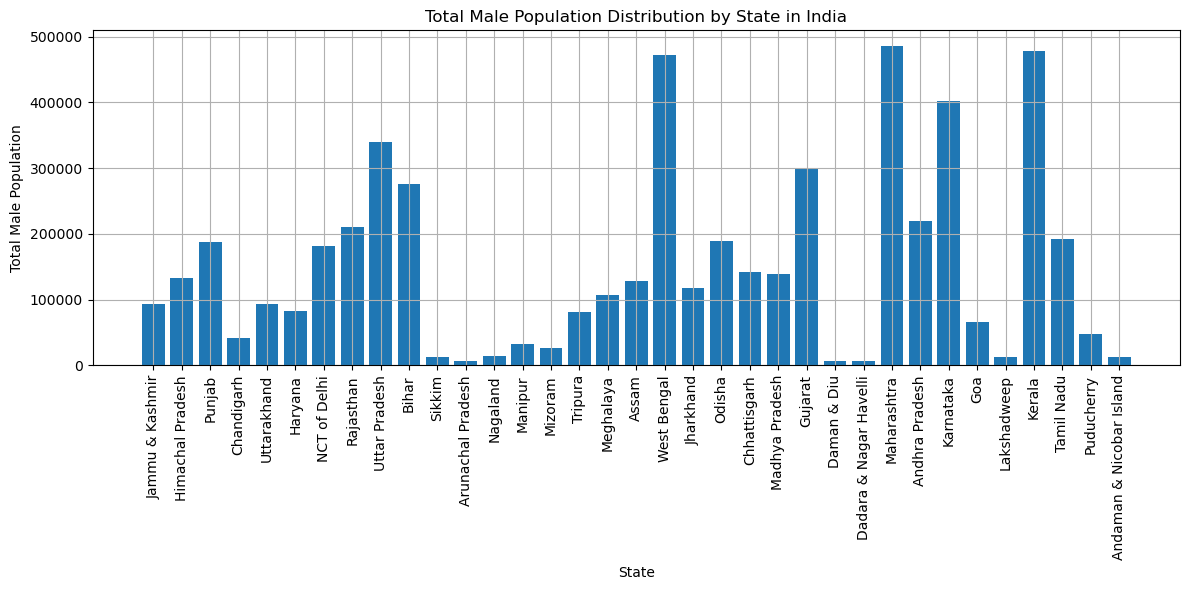

State with the highest total male population: Maharashtra


In [73]:
# Find the state with the highest total male population
highest_male_population_state = PCA_India.loc[PCA_India['TOT_M'].idxmax(), 'State']

# Create a bar plot to visualize the total male population distribution across states
plt.figure(figsize=(12, 6))
plt.bar(PCA_India['State'], PCA_India['TOT_M'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Male Population')
plt.title('Total Male Population Distribution by State in India')
plt.grid(True)
plt.tight_layout()
plt.show()

print("State with the highest total male population:", highest_male_population_state)

* For EDA we Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

* So the 5 variables are: No_HH, TOT_M, TOT_F,TOT_WORK_M, and TOT_WORK_F

### Now Plot Histograms and Box plots for each of the five variables individually.
#### Univariate Analysis:

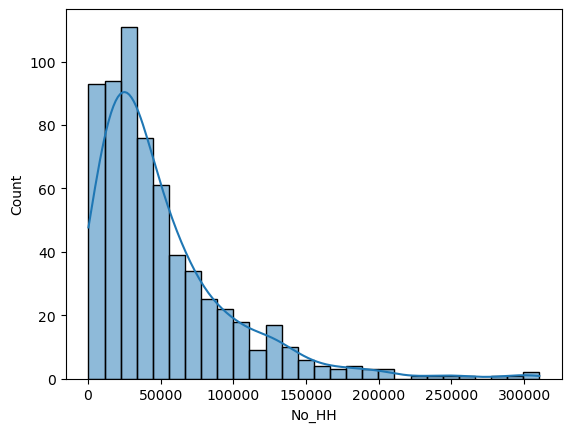

In [74]:
#Histogram of No_HH
sns.histplot(data=PCA_India, x='No_HH',kde=True);

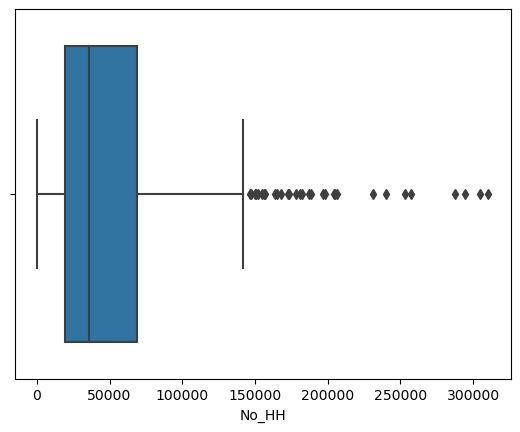

In [75]:
#Boxplot of No_HH
sns.boxplot(data=PCA_India, x='No_HH');

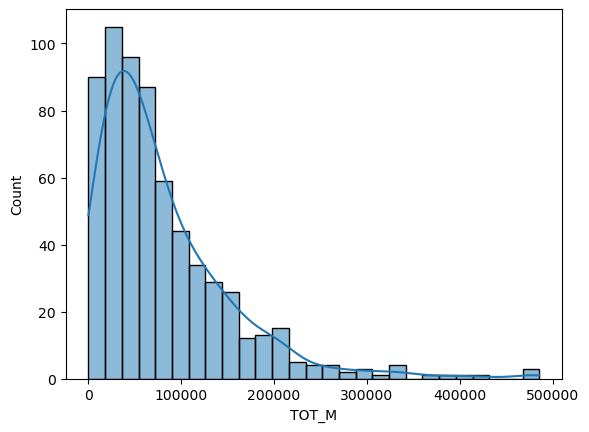

In [76]:
#Histogram of TOT_M
sns.histplot(data=PCA_India, x='TOT_M',kde=True);

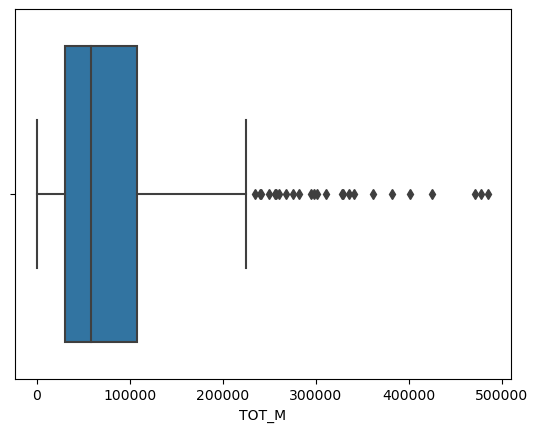

In [77]:
#Boxplot of TOT_M
sns.boxplot(data=PCA_India, x='TOT_M');

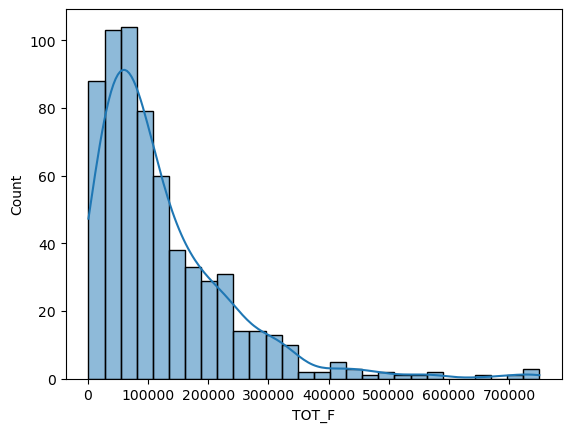

In [78]:
#Histogram of TOT_F
sns.histplot(data=PCA_India, x='TOT_F',kde=True);

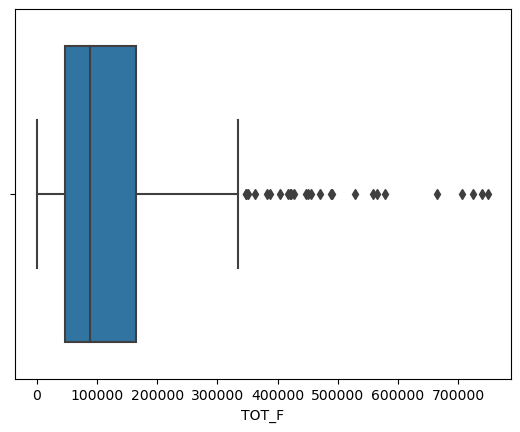

In [79]:
#Boxplot of TOT_F
sns.boxplot(data=PCA_India, x='TOT_F');

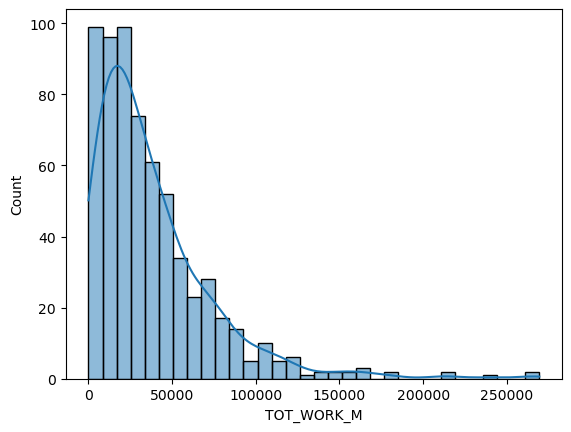

In [88]:
#Histogram of TOT_WORK_M
sns.histplot(data=PCA_India, x='TOT_WORK_M',kde=True);

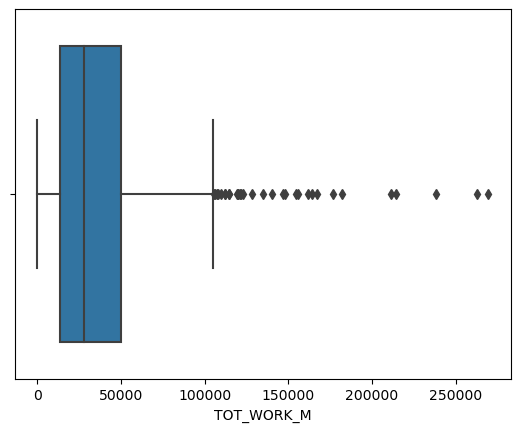

In [81]:
#Boxplot of TOT_WORK_M
sns.boxplot(data=PCA_India, x='TOT_WORK_M');

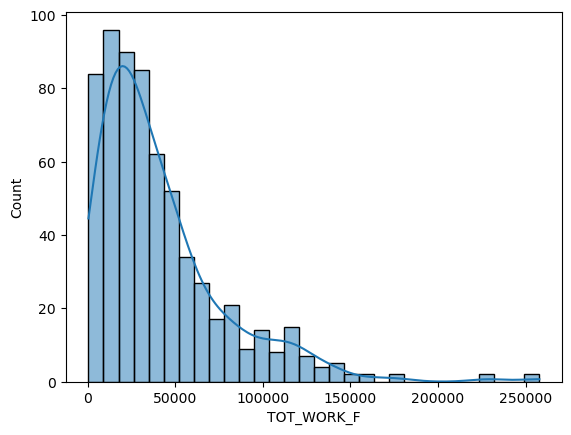

In [82]:
#Histogram of TOT_WORK_F
sns.histplot(data=PCA_India, x='TOT_WORK_F',kde=True);

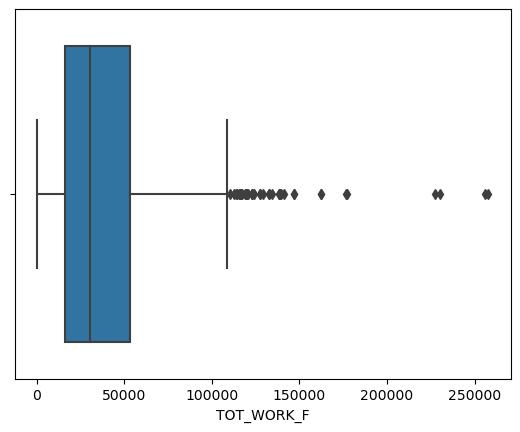

In [83]:
#Boxplot of TOT_WORK_F
sns.boxplot(data=PCA_India, x='TOT_WORK_F');

**According to Univariate analysis, all five variables are left skewed and all have outliers.**

#### Bivariate Analysis:

##### Now plot Scatterplots for No_HH, TOT_M, TOT_F, TOT_WORK_M, and TOT_WORK_F

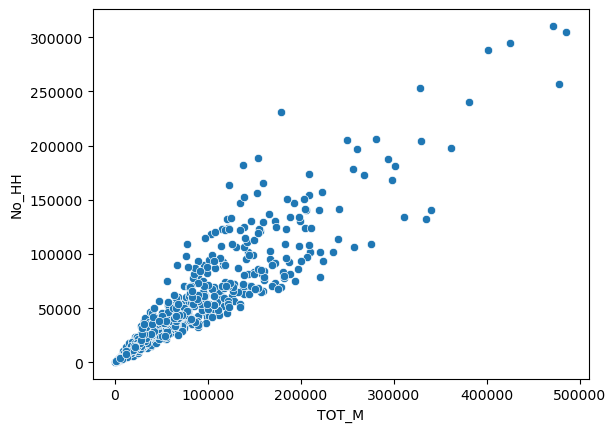

In [84]:
sns.scatterplot(data=PCA_India, x='TOT_M', y='No_HH');

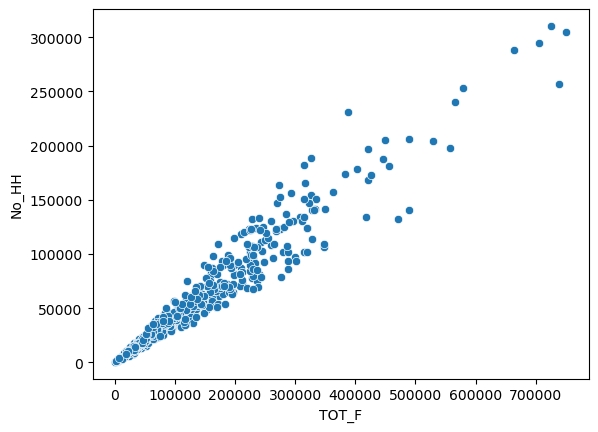

In [85]:
sns.scatterplot(data=PCA_India, x='TOT_F', y='No_HH');

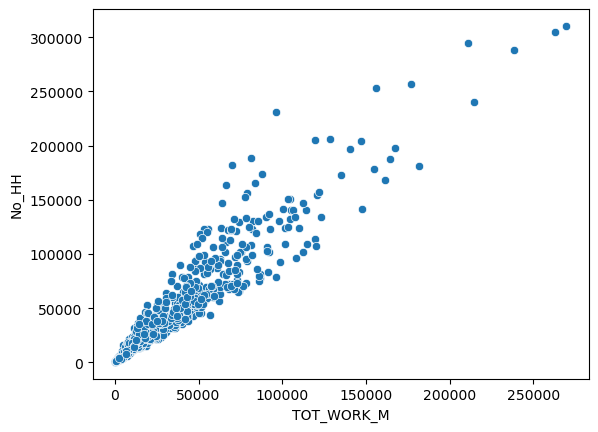

In [86]:
sns.scatterplot(data=PCA_India, x='TOT_WORK_M', y='No_HH');

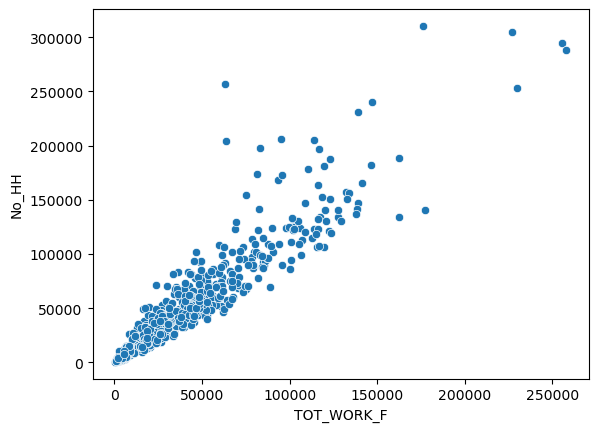

In [87]:
sns.scatterplot(data=PCA_India, x='TOT_WORK_F', y='No_HH');

**According to Bivariate Analysis, all five variables are Positively Co-related to each other.**

#### 2. (i) Which state has highest gender ratio and which has the lowest?

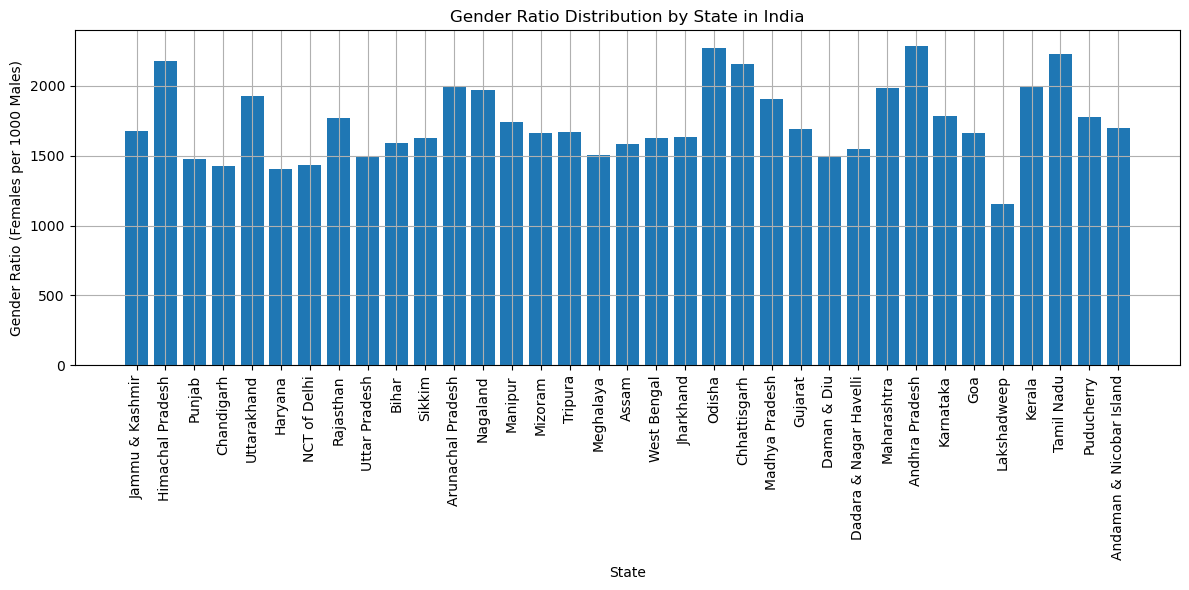

State with the highest gender ratio: Andhra Pradesh
State with the lowest gender ratio: Lakshadweep


In [89]:
# Calculate gender ratio for each state
PCA_India['Gender_Ratio'] = (PCA_India['TOT_F'] / PCA_India['TOT_M']) * 1000

# Find the state with the highest gender ratio
highest_gender_ratio_state = PCA_India.loc[PCA_India['Gender_Ratio'].idxmax(), 'State']

# Find the state with the lowest gender ratio
lowest_gender_ratio_state = PCA_India.loc[PCA_India['Gender_Ratio'].idxmin(), 'State']

# Create a bar plot to visualize the gender ratio distribution across states
plt.figure(figsize=(12, 6))
plt.bar(PCA_India['State'], PCA_India['Gender_Ratio'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Gender Ratio (Females per 1000 Males)')
plt.title('Gender Ratio Distribution by State in India')
plt.grid(True)
plt.tight_layout()
plt.show()

print("State with the highest gender ratio:", highest_gender_ratio_state)
print("State with the lowest gender ratio:", lowest_gender_ratio_state)

#### 2. (ii) Which district has the highest & lowest gender ratio?

In [90]:
# Calculate the gender ratio for each district
PCA_India['Gender_Ratio'] = (PCA_India['TOT_F'] / PCA_India['TOT_M']) * 1000

# Find the district with the highest gender ratio
highest_gender_ratio_district = PCA_India.loc[PCA_India['Gender_Ratio'].idxmax(), 'Area Name']

# Find the district with the lowest gender ratio
lowest_gender_ratio_district = PCA_India.loc[PCA_India['Gender_Ratio'].idxmin(), 'Area Name']

# Calculate the gender ratio for each district
PCA_India['Gender_Ratio'] = (PCA_India['TOT_F'] / PCA_India['TOT_M']) * 1000

# Find the district with the highest gender ratio
highest_gender_ratio_district = PCA_India.loc[PCA_India['Gender_Ratio'].idxmax(), 'Area Name']

# Find the district with the lowest gender ratio
lowest_gender_ratio_district = PCA_India.loc[PCA_India['Gender_Ratio'].idxmin(), 'Area Name']

print("District with the highest gender ratio:", highest_gender_ratio_district)
print("District with the lowest gender ratio:", lowest_gender_ratio_district)

District with the highest gender ratio: Krishna
District with the lowest gender ratio: Lakshadweep


### 3. PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Outliers have a significant impact on clustering. So it is important to identify and remove outliers before applying the K-means Clustering algorithm.

### 4. PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

#### Drop unnecessary features. like State Code,	Dist.Code,	State, Area Name, Gender_Ratio, and Total_Population

In [91]:
# List of unnecessary features to drop
columns_to_drop = ['State Code', 'Dist.Code', 'State', 'Area Name','Gender_Ratio','Total_Population']

# Drop the unnecessary columns from the DataFrame
PCA_India_cleaned = PCA_India.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
PCA_India_cleaned.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [92]:
def count_outliers_iqr(column_data):
    if pd.api.types.is_numeric_dtype(column_data):
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((column_data < lower_bound) | (column_data > upper_bound)).sum()
    else:
        return 0

# Count outliers for each column
outliers_count = {}
for column in PCA_India_cleaned.columns:
    outliers_count[column] = count_outliers_iqr(PCA_India_cleaned[column])

print("Number of outliers in each column:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

Number of outliers in each column:
No_HH: 31
TOT_M: 25
TOT_F: 26
M_06: 32
F_06: 33
M_SC: 29
F_SC: 29
M_ST: 51
F_ST: 58
M_LIT: 30
F_LIT: 37
M_ILL: 39
F_ILL: 26
TOT_WORK_M: 32
TOT_WORK_F: 42
MAINWORK_M: 36
MAINWORK_F: 55
MAIN_CL_M: 25
MAIN_CL_F: 29
MAIN_AL_M: 36
MAIN_AL_F: 60
MAIN_HH_M: 47
MAIN_HH_F: 56
MAIN_OT_M: 53
MAIN_OT_F: 59
MARGWORK_M: 43
MARGWORK_F: 19
MARG_CL_M: 55
MARG_CL_F: 53
MARG_AL_M: 48
MARG_AL_F: 30
MARG_HH_M: 58
MARG_HH_F: 39
MARG_OT_M: 46
MARG_OT_F: 42
MARGWORK_3_6_M: 31
MARGWORK_3_6_F: 32
MARG_CL_3_6_M: 44
MARG_CL_3_6_F: 15
MARG_AL_3_6_M: 56
MARG_AL_3_6_F: 49
MARG_HH_3_6_M: 43
MARG_HH_3_6_F: 25
MARG_OT_3_6_M: 58
MARG_OT_3_6_F: 40
MARGWORK_0_3_M: 48
MARGWORK_0_3_F: 40
MARG_CL_0_3_M: 48
MARG_CL_0_3_F: 35
MARG_AL_0_3_M: 55
MARG_AL_0_3_F: 59
MARG_HH_0_3_M: 63
MARG_HH_0_3_F: 46
MARG_OT_0_3_M: 60
MARG_OT_0_3_F: 42
NON_WORK_M: 54
NON_WORK_F: 47


### Plotting a box plot of those columns that contain only numerical values.

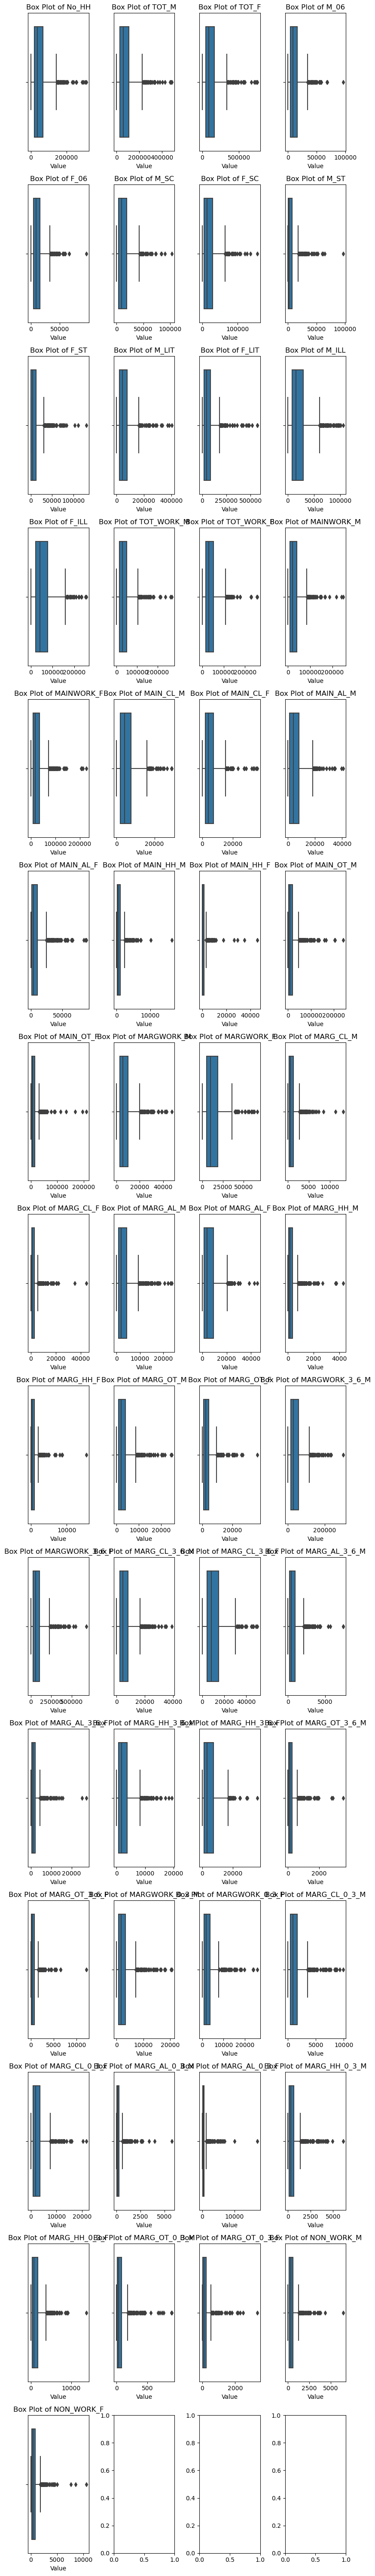

In [93]:
# Plot individual box plots for each numeric column with increased figure sizes in multiple lines
num_plots = len(PCA_India_cleaned.columns)
num_rows = 15  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 4))

for i, column in enumerate(PCA_India_cleaned.columns):
    sns.boxplot(x=PCA_India_cleaned[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

### Perform z-score scaling

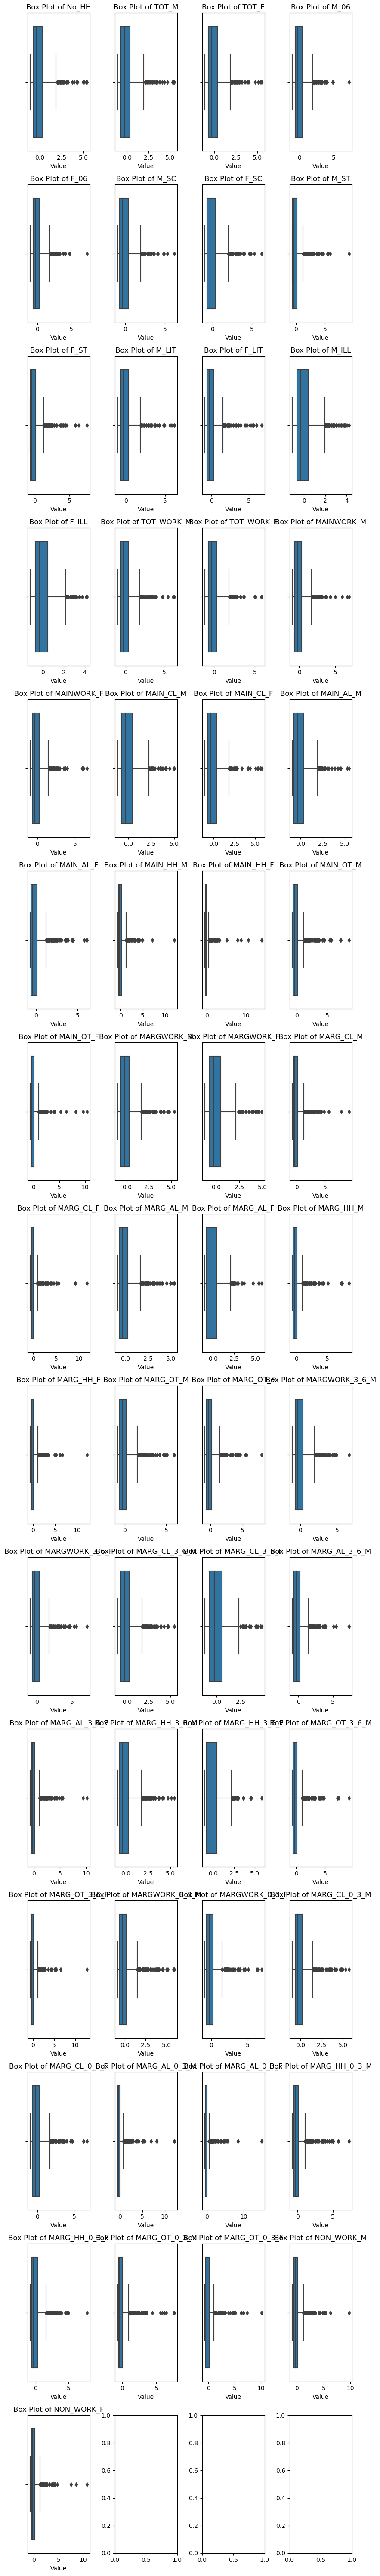

In [94]:
PCA_India_scaled = (PCA_India_cleaned - PCA_India_cleaned.mean()) / PCA_India_cleaned.std()

# Plot box plots after scaling
num_plots = len(PCA_India_scaled.columns)
num_rows = 15  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 4))

for i, column in enumerate(PCA_India_scaled.columns):
    sns.boxplot(x=PCA_India_scaled[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

**Conclusion:** We can say that Scaling has no impact on outliers, according to before and after outlier trimming and visualization of box plots.
* For further processing, we treat the outliers.

**To treat outliers lets define a function 'treat_outlier'.**

For the higher outliers we will treat it to get it at 95 percentile value.

Lower level outliers will be treated to get it at 5 percentile value.

In [95]:
def treat_outlier(data): 
    # Calculate the 5th and 95th percentile values
    lower_percentile = data.quantile(0.05)
    upper_percentile = data.quantile(0.95)
    # Treat higher outliers
    data = np.where(data > upper_percentile, upper_percentile, data)

    # Treat lower outliers
    data = np.where(data < lower_percentile, lower_percentile, data)

    return data

In [96]:
# Treat outliers in the DataFrame
PCA_India_cleaned_treated = PCA_India_cleaned.apply(treat_outlier)

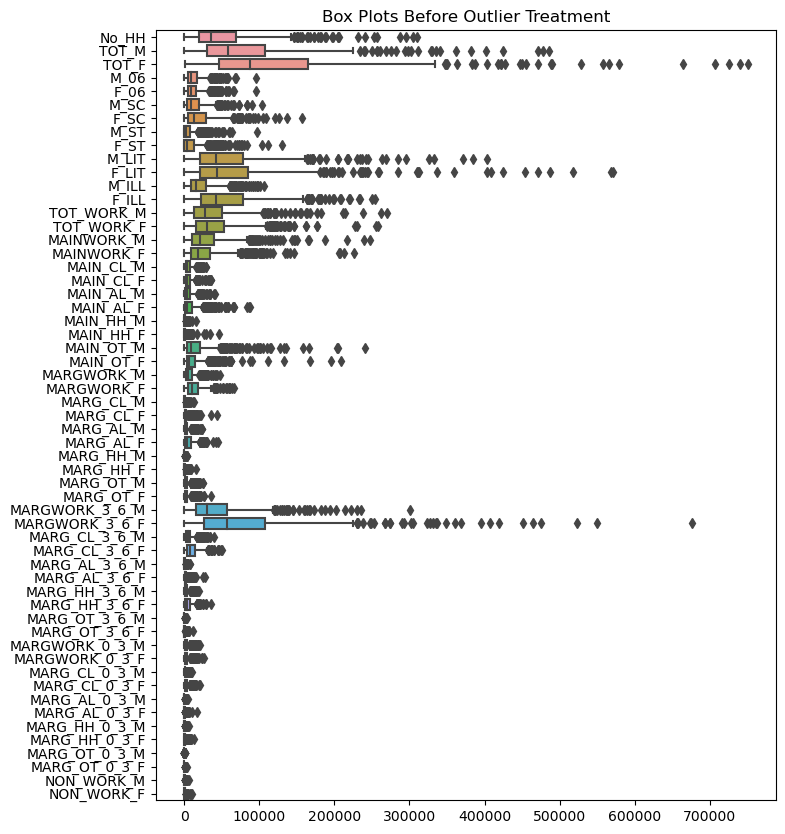

In [99]:
# Compare box plots before and after treating outliers

plt.figure(figsize=(8, 10))
sns.boxplot(data=PCA_India_cleaned,orient='h');
plt.title("Box Plots Before Outlier Treatment");

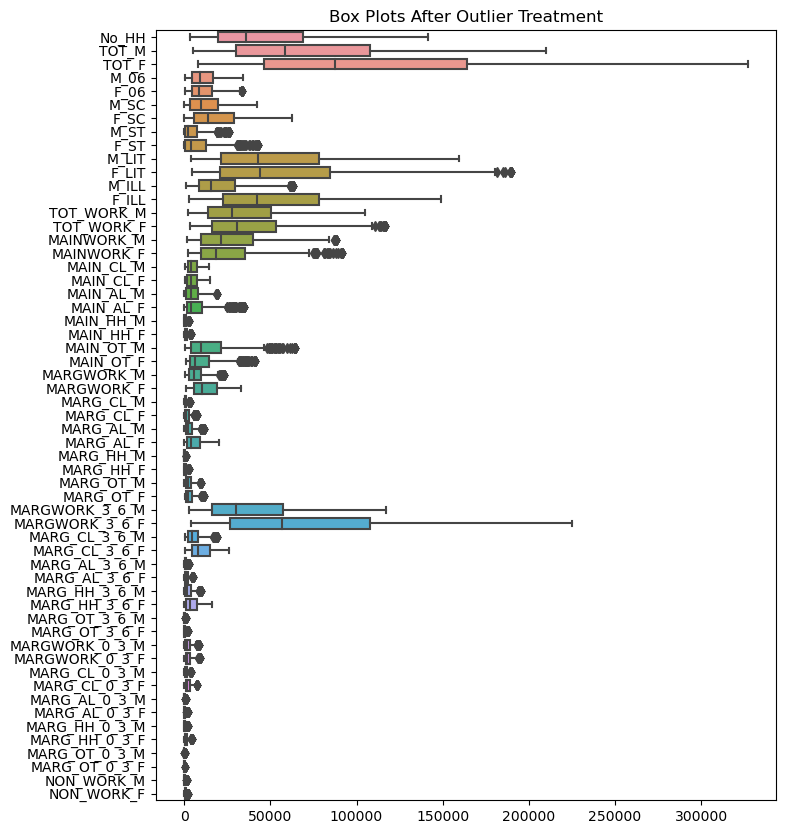

In [98]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=PCA_India_cleaned_treated,orient='h');
plt.title("Box Plots After Outlier Treatment");

### 5. PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [100]:
# Step 1: Standardize the data using z-score scaling
scaler = StandardScaler()
PCAIndia_scaled = scaler.fit_transform(PCA_India_cleaned_treated)

In [101]:
# Step 2: Create the covariance matrix
covariance_matrix = np.cov(PCAIndia_scaled, rowvar=False)
print("covariance_matrix:")
print(covariance_matrix)

covariance_matrix:
[[1.00156495 0.91288416 0.97304568 ... 0.64390892 0.76800425 0.79093271]
 [0.91288416 1.00156495 0.97984644 ... 0.72559871 0.85906948 0.77715037]
 [0.97304568 0.97984644 1.00156495 ... 0.70486133 0.83628756 0.80301997]
 ...
 [0.64390892 0.72559871 0.70486133 ... 1.00156495 0.75100717 0.70813034]
 [0.76800425 0.85906948 0.83628756 ... 0.75100717 1.00156495 0.9048239 ]
 [0.79093271 0.77715037 0.80301997 ... 0.70813034 0.9048239  1.00156495]]


In [102]:
# Step 3: Get eigenvalues and eigenvectors using sklearn's PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(PCAIndia_scaled)

PCA()

In [103]:
# Eigenvalues represent the amount of variance explained by each principal component
eigenvalues = pca.explained_variance_
print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[3.51964508e+01 7.75864164e+00 3.85313758e+00 2.93088251e+00
 2.01945117e+00 1.20283006e+00 1.05103883e+00 4.73410095e-01
 3.80311737e-01 3.18502503e-01 2.82337363e-01 2.11384169e-01
 1.80828864e-01 1.58534721e-01 1.34716174e-01 1.18114933e-01
 1.03095461e-01 8.94103559e-02 8.17461188e-02 7.41246556e-02
 6.82600138e-02 5.76145806e-02 4.88597660e-02 3.95906909e-02
 3.58001574e-02 2.79156242e-02 2.45501882e-02 2.36365599e-02
 2.13936483e-02 1.85082625e-02 1.52904953e-02 1.40346774e-02
 1.15247344e-02 1.13716166e-02 9.12573518e-03 7.91717986e-03
 6.59703591e-03 5.48569071e-03 4.70879023e-03 3.35011299e-03
 2.82906202e-03 2.38708937e-03 2.09550435e-03 1.32016186e-03
 1.01120293e-03 9.02948881e-04 8.47903528e-04 6.75743915e-04
 5.93576716e-04 5.58134687e-04 4.66754410e-04 2.92512691e-04
 2.31094543e-04 1.87648731e-04 1.20499123e-04 1.09839330e-04
 8.69325448e-05]


In [104]:
# Eigenvectors represent the directions of the principal components in the original feature space
eigenvectors = pca.components_

print("\nEigenvectors:")
print(eigenvectors)


Eigenvectors:
[[ 0.15023744  0.16052153  0.15955834 ...  0.14148045  0.14763628
   0.14086398]
 [-0.11528684 -0.07678683 -0.09111385 ...  0.0370082  -0.05070556
  -0.04588453]
 [ 0.10318023 -0.02970629  0.03432408 ... -0.10348503 -0.13764487
  -0.04249229]
 ...
 [-0.00593624 -0.04996136  0.0350455  ...  0.00897393  0.02677304
   0.00181857]
 [ 0.01726872 -0.02644952  0.00758134 ...  0.01022161 -0.08216062
   0.00725763]
 [ 0.00104469 -0.00707503  0.03342686 ... -0.00884273  0.07502936
  -0.00443845]]


In [105]:
# Loadings: correlation between PCs and original variables
loadings = pca.components_ * np.sqrt(pca.explained_variance_)

In [106]:
# Organize explained variance and loadings in a DataFrame
variance_df = pd.DataFrame({
    'Principal Component': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Explained Variance': eigenvalues / np.sum(eigenvalues),
    'Most Influential Variable': PCA_India_cleaned.columns[np.argmax(np.abs(loadings), axis=0)],
    'Loadings': loadings.tolist()
})

print("\nExplained Variance and Loadings:")
variance_df.T


Explained Variance and Loadings:


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Principal Component,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
Explained Variance,0.616517,0.135904,0.067493,0.051339,0.035374,0.021069,0.01841,0.008292,0.006662,0.005579,...,0.000012,0.00001,0.00001,0.000008,0.000005,0.000004,0.000003,0.000002,0.000002,0.000002
Most Influential Variable,MARG_OT_M,MARG_AL_0_3_M,MARG_OT_3_6_M,MARG_OT_3_6_F,MARG_OT_3_6_F,F_ST,F_ST,MARG_CL_3_6_M,MARG_CL_3_6_M,MARGWORK_0_3_M,...,MARGWORK_M,MARG_HH_M,MAIN_CL_M,MARG_CL_F,MARGWORK_3_6_M,MARG_AL_M,MAIN_OT_F,MARG_CL_F,MARG_OT_F,MAIN_HH_F
Loadings,"[0.8913076255492959, 0.4471221135545423, 0.313...","[-0.6839576012301155, -0.21388464655389436, -0...","[0.6121332181258797, -0.0827449122762405, 0.06...","[0.4427078726870926, 0.140776687303528, 0.1322...","[-0.09136713149763623, -0.15309921045839497, -...","[-0.38036863400160537, -0.21347432456281587, -...","[0.6982202257700716, -0.31992618773205006, 0.0...","[0.46651839371783843, 0.28986186983735235, 0.2...","[0.15677150776838178, 0.11178683012055868, 0.0...","[0.5581982344041546, -0.0859368329766188, 0.02...",...,"[0.15976083838418612, 0.1580504094016999, -0.3...","[-0.1024915998880218, -0.02632796383880579, 0....","[-0.23245331657596455, -1.5911937880974056, 0....","[-0.1646845994114152, -0.9854161172255576, 0.3...","[0.08968656772209985, 0.2639838883416747, -0.0...","[-0.2009561054382648, -0.24629825508844666, 0....","[-0.1245907546924603, -0.24331224720089545, 0....","[-0.03521767620014727, -0.1391640544389626, 0....","[0.10244942446085425, -0.07367338793316812, 0....","[0.006197812416218915, -0.01970701580157716, 0..."


 ### 6. PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [107]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.62 0.14 0.07 0.05 0.04 0.02 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [108]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 61.65  75.24  81.99  87.13  90.66  92.77  94.61  95.44  96.11  96.66
  97.16  97.53  97.85  98.12  98.36  98.57  98.75  98.9   99.05  99.18
  99.3   99.4   99.48  99.55  99.61  99.66  99.71  99.75  99.79  99.82
  99.84  99.87  99.89  99.91  99.93  99.94  99.95  99.96  99.97  99.97
  99.98  99.98  99.99  99.99  99.99  99.99  99.99 100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


### Scree plot

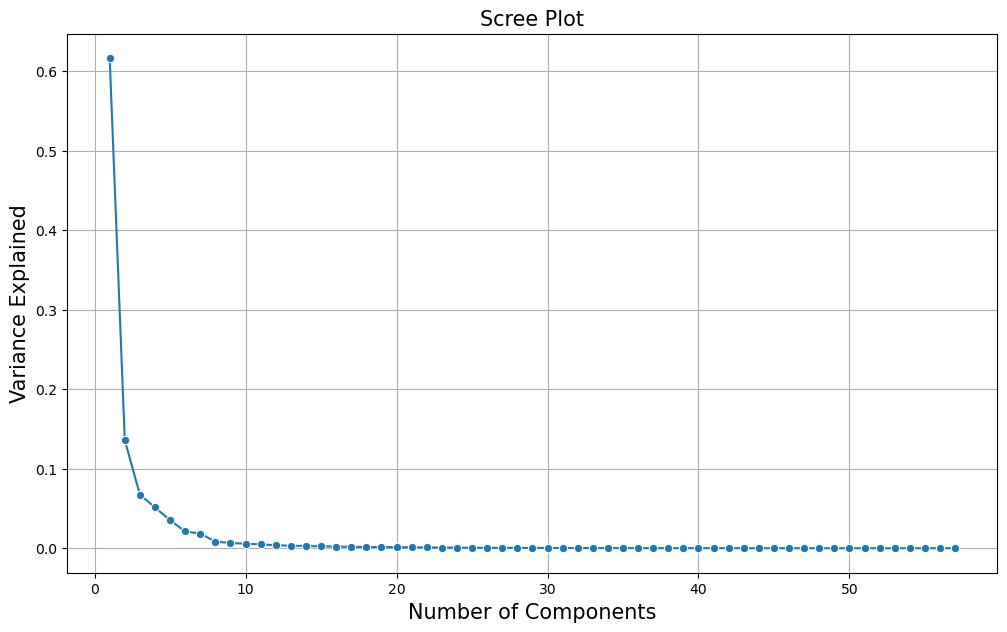

In [109]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [111]:
# Find the number of PCs needed to explain at least 90% variance
num_pcs_90_var = np.argmax(cum_var_exp >= 0.90) + 1
print(f"Number of PCs to explain at least 90% variance: {num_pcs_90_var}")

Number of PCs to explain at least 90% variance: 5


### 7. PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [114]:
# Loadings: correlation between PCs and original variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Organize explained variance and loadings in a DataFrame
variance_df = pd.DataFrame({
    'Principal Component': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Explained Variance': eigenvalues / np.sum(eigenvalues),
    'Most Influential Variable': PCA_India_cleaned.columns[np.argmax(np.abs(loadings), axis=0)],
    'Loadings': loadings.tolist()
})

print("\nExplained Variance and Loadings:")
variance_df.T


Explained Variance and Loadings:


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Principal Component,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
Explained Variance,0.616517,0.135904,0.067493,0.051339,0.035374,0.021069,0.01841,0.008292,0.006662,0.005579,...,0.000012,0.00001,0.00001,0.000008,0.000005,0.000004,0.000003,0.000002,0.000002,0.000002
Most Influential Variable,TOT_M,MARG_AL_0_3_F,MAIN_AL_F,MARG_AL_3_6_F,F_ST,MARG_OT_3_6_F,M_ST,MAIN_CL_M,M_SC,MAIN_AL_M,...,MARGWORK_F,MARG_CL_F,TOT_M,MARG_OT_F,MARG_HH_F,MARG_AL_F,MARG_HH_M,MARG_AL_M,MARG_OT_M,MARGWORK_M
Loadings,"[0.8913076255492959, -0.32112387165568484, 0.2...","[0.9523196349961867, -0.21388464655389436, -0....","[0.9466053020185625, -0.25379159931791173, 0.0...","[0.9350644173605095, -0.04938523181587537, -0....","[0.936991326356999, -0.03345853526890607, -0.1...","[0.8573479585881317, -0.21104317017131127, -0....","[0.8582675582013596, -0.23364661976726386, 0.0...","[0.12208692908278188, 0.16063208225774495, 0.5...","[0.11907654059074073, 0.1566158353147054, 0.62...","[0.9293901463250435, -0.2843915211952655, -0.0...",...,"[0.8522758021234148, 0.38819612932056163, -0.2...","[0.7994700896431594, 0.46299526592770074, 0.06...","[0.37349233190693665, 0.7677344637467416, -0.2...","[0.32401882433500795, 0.7814343838588058, -0.1...","[0.7138742034956348, 0.5139539847458224, 0.009...","[0.676848004307706, 0.48877919398738073, 0.297...","[0.8360780269778895, 0.1863024352109115, -0.30...","[0.8393553547119904, 0.10308390285620143, -0.2...","[0.8758758091829465, -0.14123699204034063, -0....","[0.835698059777317, -0.12780831942991136, -0.0..."


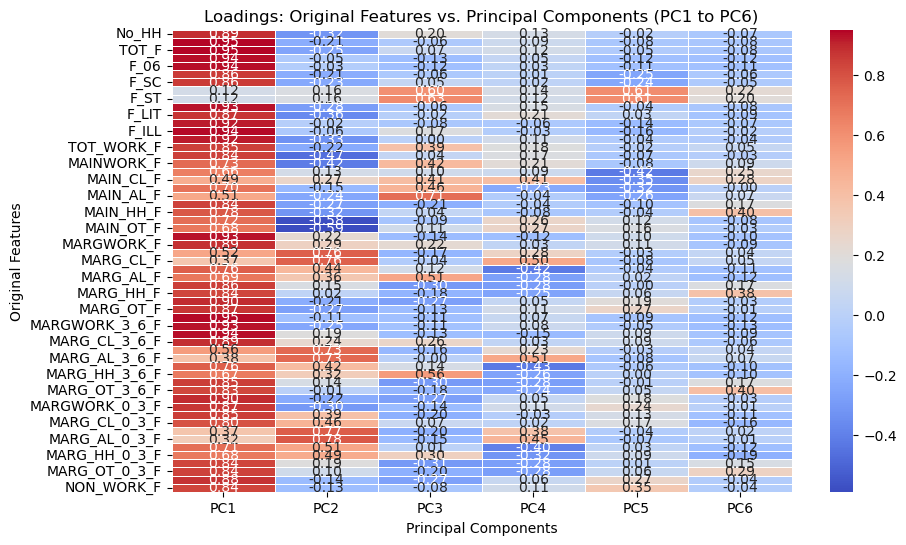

In [118]:
# Loadings: correlation between PCs and original variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to store loadings for first six Principal Components
loadings_df = pd.DataFrame(loadings[:, :6], columns=[f"PC{i+1}" for i in range(6)], index=PCA_India_cleaned.columns)

# Heatmap for first six Principal Components
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Loadings: Original Features vs. Principal Components (PC1 to PC6)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

### 8 PCA: Write linear equation for first PC.

To write the linear equation for the first Principal Component (PC1), we need to consider the loadings of each original feature on PC1. The loadings represent the correlation between the original features and the first Principal Component. These loadings are stored in the first column of the loadings array obtained from PCA.

Let's assume the original features are represented by X1, X2, X3, ..., Xn, and the loadings for PC1 are represented by L1, L2, L3, ..., Ln. The linear equation for PC1 can be written as follows:

PC1 = L1 * X1 + L2 * X2 + L3 * X3 + ... + Ln * Xn
Here, PC1 is the value of the first Principal Component, X1, X2, X3, ..., Xn are the original features, and L1, L2, L3, ..., Ln are the loadings of each original feature on PC1.

Since the loadings array contains the loadings for each original feature on PC1, we can write the linear equation directly from the loadings array.